# Random Forest

In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from pprint import pprint

/opt/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv("table_7.csv")
y = data['target_mood']

# Data

In [3]:
#fill in with 0 all the NaN
data.fillna(0, inplace =True)
data.describe()

,p31,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,...,p19,p15,p5,p20,p24,p13,p33,p29,p25,p8
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,...,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000
mean,0.034640,6.993289,0.471225,0.677944,0.122743,17889.691174,9.807657,6.973694,4583.934327,7927.983185,...,0.035552,0.042844,0.041933,0.032817,0.044667,0.041933,0.035552,0.032817,0.021878,0.048314
std,0.182949,0.504513,0.115031,0.064690,0.076968,11085.613003,5.549894,3.708287,5503.547583,5549.641464,...,0.185254,0.202598,0.200526,0.178238,0.206667,0.200526,0.185254,0.178238,0.146351,0.214526
min,0.000000,4.961905,0.186310,0.442262,0.015550,691.638858,2.285714,2.000000,-30604.373571,112.184143,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.778571,0.394643,0.637500,0.077427,9148.501714,6.000000,3.857143,1302.603857,4082.840571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,7.028571,0.463690,0.687500,0.102262,16734.774857,8.571429,6.000000,3100.714286,6796.883571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,7.285714,0.555357,0.728571,0.135071,24882.852859,12.428571,9.000000,5741.493429,10404.828429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,8.233333,0.741071,0.853571,0.440491,51824.628430,33.428571,24.428571,30026.592429,33745.471714,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
del data['period']

scaler = MinMaxScaler(feature_range=(-1, 1))
target = scaler.fit_transform(np.array(data['target_mood'], dtype = float).reshape(-1, 1))

del data['target_mood']
colnames = data.columns
data = scaler.fit_transform(np.array(data, dtype = float))
X = pd.DataFrame(data)
X.columns = colnames

# Training and Tests

In [5]:
#drop var

# del X['appCat.finance']
# del X['appCat.finance']
X = X.drop(['p1', 'p2', 'p3', 'p5', 'p6', 'p7','p8', 'p9', 'p12', 'p13', 'p14', 'p15','p16', 'p17', 'p19', 'p20', 'p23','p24', 'p25','p26', 'p27', 'p28', 'p29', 'p30','p31', 'p32', 'p33','appCat.finance', 'appCat.game', 'appCat.weather','mon','tue','wed','thu','fri','sat','sun','appCat.unknown','appCat.office','appCat.utilities','appCat.other','appCat.communication','appCat.builtin','call','screen','appCat.travel','appCat.social','sms' ], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Training size :{}; Test size: {}".format(len(X_train),len(X_test)))

Training size :877; Test size: 220


In [6]:
# The baseline predictions are the historical averages
baseline_preds = X['mood']

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - y_test)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

('Average baseline error: ', 6.76, 'degrees.')


# Train the model

In [7]:
# Initiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(X_train, y_train);

In [8]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


# Make predictions on the tests

In [9]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

('Mean Absolute Error:', 0.43, 'degrees.')


# Determine Performance Matrix

In [10]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

('Accuracy:', 93.6, '%.')


# Visualizing a Single Decision Tree

In [12]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

X_list = list(X.columns)
# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png');

In [13]:
print('The depth of this tree is:', tree.tree_.max_depth)

('The depth of this tree is:', 22)


In [14]:
# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(X_train, y_train)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png');

# Variable Importance

In [15]:
#Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
print 'Most important features: %s' %feature_importances
#[print('Variable: {:10} Importance: {}'.format(*pair)) for pair in feature_importances];

Most important features: [('mood', 0.43), ('appCat.entertainment', 0.15), ('circumplex.arousal', 0.14), ('circumplex.valence', 0.14), ('activity', 0.13)]


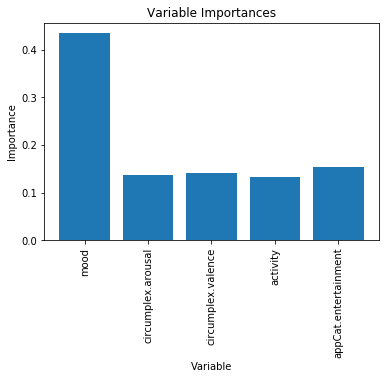

In [16]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, X_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Prediction and Actual Values

In [17]:
# Features of training values
moods = X['mood']
#builtins = X['appCat.builtin']
#unknowns = X['appCat.unknown']

# List of features
#features = [str(int(mood)) + '-' + str(int(builtin)) + '-' + str(int(unknown)) for mood, builtin, unknown in zip(moods, builtins, unknowns)]

# Dataframe with true values 
true_data = pd.DataFrame(data = {'mood': moods, 'actualmood': y})

# Features of predictions
test_moods = X_test['mood']
#test_builtins = X_test['appCat.builtin']
#test_unknowns = X_test['appCat.unknown']

# Column of features
#test_features = [str(int(mood)) + '-' + str(int(builtin)) + '-' + str(int(unknown)) for mood, builtin, unknown in zip(moods, builtins, unknowns)]


# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'mood': test_moods, 'prediction': predictions})

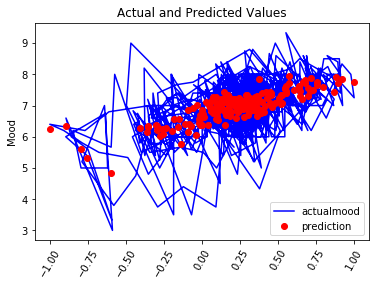

In [18]:
# Plot the actual values
plt.plot(true_data['mood'], true_data['actualmood'], 'b-', label = 'actualmood')

# Plot the predicted values
plt.plot(predictions_data['mood'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel(''); plt.ylabel('Mood'); plt.title('Actual and Predicted Values');

# Random Hyperparameter Grid

In [19]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [400, 577, 755, 933, 1111, 1288, 1466, 1644, 1822, 2000]}


# Random Search Training

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tunet
rf = RandomForestRegressor()
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

In [ ]:
rf_random.cv_results_

# Evaluate 

In [ ]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
base_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
base_model.fit(X_train,  y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

In [ ]:
#evaluate best random
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

# Grid Search with Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [1000, 1600, 1200, 2000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)